In [1]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import sklearn.linear_model
import scipy, scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
%matplotlib inline

GMHF_Hedge_Funds = pd.read_csv("Group1_Data_Set.csv")
GMHF_Hedge_Funds.head()

,Date,GMHF_Mean,Mkt_RF,SMB,HML,RF,MOM,RMW,CMA,PTFSBD,...,DGS10,DEF,DIV,GDP,INFLTN,MKT,RREL,TERM,UNEMP,VIX
0,199401,0.0211,2.87,0.14,2.09,0.25,0.02,-2.28,1.47,-0.13,...,5.70,0.73,12.62,-1.96,146.3,2.87,0.41,2.71,6.6,10.63
1,199402,-0.0640,-2.55,2.73,-1.44,0.21,-0.29,2.45,-1.05,0.46,...,6.15,0.68,12.67,0.11,146.7,-2.55,0.44,2.64,6.6,14.87
2,199403,-0.0343,-4.78,-0.98,1.31,0.27,-1.33,0.77,1.25,0.36,...,6.77,0.65,12.71,0.24,147.1,-4.78,0.61,2.89,6.5,20.45
3,199404,-0.0120,0.68,-0.93,1.68,0.27,0.41,1.01,1.12,0.11,...,7.06,0.64,12.75,-0.10,147.2,0.68,0.89,3.19,6.4,13.77
4,199405,0.0225,0.58,-2.02,0.20,0.31,-2.15,0.90,0.71,0.06,...,7.17,0.63,12.80,1.05,147.5,0.58,0.89,2.92,6.1,13.03


In [12]:
GMHF_Hedge_Funds_Fama_French = pd.read_csv("Group1_Data_Set_Fama_French.csv")
GMHF_Hedge_Funds_Fama_French.head()

,GMHF_Mean,Mkt_RF,SMB,HML,MOM
0,0.0211,2.87,0.14,2.09,0.02
1,-0.0640,-2.55,2.73,-1.44,-0.29
2,-0.0343,-4.78,-0.98,1.31,-1.33
3,-0.0120,0.68,-0.93,1.68,0.41
4,0.0225,0.58,-2.02,0.20,-2.15


In [13]:
GMHF_Hedge_Funds_Fama_French.describe()

,GMHF_Mean,Mkt_RF,SMB,HML,MOM
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.005155,0.625467,0.112667,0.149233,0.431233
std,0.017692,4.296355,3.280816,3.026984,4.926031
min,-0.064000,-17.230000,-16.870000,-11.100000,-34.390000
25%,-0.005525,-1.960000,-1.972500,-1.442500,-1.300000
50%,0.003950,1.185000,0.025000,-0.060000,0.480000
75%,0.015100,3.377500,1.912500,1.682500,2.825000
max,0.068200,11.350000,21.710000,12.900000,18.360000


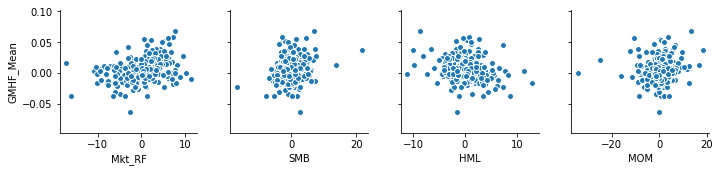

In [19]:
sns.pairplot(data=GMHF_Hedge_Funds_Fama_French, 
                  y_vars=['GMHF_Mean'],
                  x_vars=['Mkt_RF', 'SMB', 'HML', 'MOM'])

In [15]:
GMHF_Hedge_Funds_Risk = pd.read_csv("Group1_Data_Set_Risk_Factors.csv")
GMHF_Hedge_Funds_Risk.head()

,GMHF_Mean,PTFSBD,PTFSFX,PTFSCOM,PTFSIR,PTFSSTK,CS_factor,DGS10
0,0.0211,-0.13,-0.30,-0.22,-0.07,0.09,1.85,5.70
1,-0.0640,0.46,0.14,-0.14,0.15,-0.13,1.77,6.15
2,-0.0343,0.36,-0.11,0.03,0.03,-0.02,1.59,6.77
3,-0.0120,0.11,-0.08,0.01,0.01,-0.22,1.48,7.06
4,0.0225,0.06,-0.29,-0.03,0.03,-0.02,1.51,7.17


In [16]:
GMHF_Hedge_Funds_Risk.describe()

,GMHF_Mean,PTFSBD,PTFSFX,PTFSCOM,PTFSIR,PTFSSTK,CS_factor,DGS10
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.005155,-0.01890,-0.008167,-0.005833,-0.020800,-0.048400,2.421133,4.133867
std,0.017692,0.15202,0.193697,0.140519,0.249809,0.141559,0.786240,1.636767
min,-0.064000,-0.27000,-0.320000,-0.250000,-0.420000,-0.300000,1.300000,1.460000
25%,-0.005525,-0.13000,-0.150000,-0.100000,-0.140000,-0.150000,1.770000,2.667500
50%,0.003950,-0.05000,-0.050000,-0.030000,-0.070000,-0.070000,2.335000,4.095000
75%,0.015100,0.04000,0.082500,0.060000,0.040000,0.020000,2.860000,5.422500
max,0.068200,0.69000,0.900000,0.650000,2.220000,0.670000,6.100000,7.910000


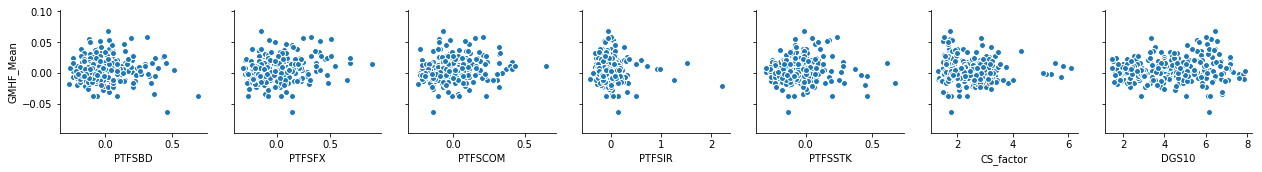

In [5]:
sns.pairplot(data=GMHF_Hedge_Funds_Risk, 
                  y_vars=['GMHF_Mean'],
                  x_vars=['PTFSBD', 'PTFSFX', 'PTFSCOM', 'PTFSIR', 'PTFSSTK', 'CS_factor', 'DGS10'])

In [17]:
GMHF_Hedge_Funds_Macroeconomic_Factors = pd.read_csv("Group1_Data_Set_Macroeconomic_Factors.csv")
GMHF_Hedge_Funds_Macroeconomic_Factors.head()

,GMHF_Mean,DEF,DIV,GDP,INFLTN,MKT,RREL,TERM,UNEMP,VIX
0,0.0211,0.73,12.62,-1.96,146.3,2.87,0.41,2.71,6.6,10.63
1,-0.0640,0.68,12.67,0.11,146.7,-2.55,0.44,2.64,6.6,14.87
2,-0.0343,0.65,12.71,0.24,147.1,-4.78,0.61,2.89,6.5,20.45
3,-0.0120,0.64,12.75,-0.10,147.2,0.68,0.89,3.19,6.4,13.77
4,0.0225,0.63,12.80,1.05,147.5,0.58,0.89,2.92,6.1,13.03


In [20]:
GMHF_Hedge_Funds_Macroeconomic_Factors.describe()

,GMHF_Mean,DEF,DIV,GDP,INFLTN,MKT,RREL,TERM,UNEMP,VIX
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.005155,0.958833,25.117967,0.150367,199.963367,0.625467,0.620500,1.701100,5.788000,19.699133
std,0.017692,0.415017,11.252852,0.720316,31.924226,4.296355,0.764919,1.090485,1.631193,7.668713
min,-0.064000,0.550000,12.620000,-5.800000,146.300000,-17.230000,0.000000,-0.700000,3.700000,9.510000
25%,-0.005525,0.690000,16.035000,-0.040000,170.975000,-1.960000,0.120000,0.882500,4.600000,13.870000
50%,0.003950,0.870000,22.230000,0.190000,201.850000,1.185000,0.280000,1.685000,5.400000,17.970000
75%,0.015100,1.072500,29.727500,0.342500,231.070000,3.377500,0.792500,2.602500,6.125000,23.662500
max,0.068200,3.380000,53.750000,4.710000,252.790000,11.350000,2.760000,3.680000,10.000000,59.890000


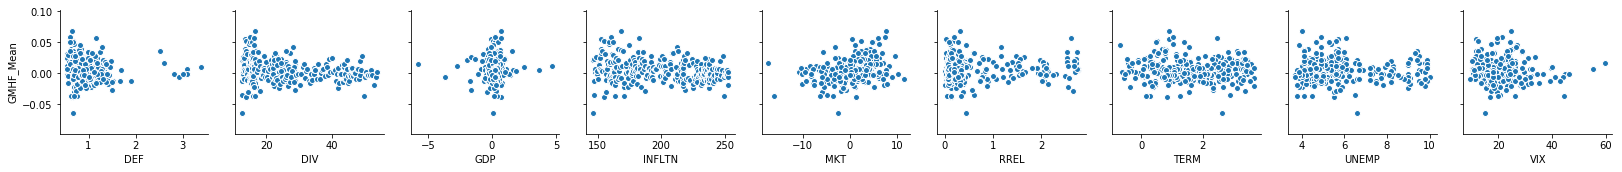

In [21]:
sns.pairplot(data=GMHF_Hedge_Funds_Macroeconomic_Factors, 
                  y_vars=['GMHF_Mean'],
                  x_vars=['DEF', 'DIV', 'GDP', 'INFLTN', 'MKT', 'RREL', 'TERM', 'UNEMP', 'VIX'])